**Import required modules**

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

import numpy as np
import matplotlib.pyplot as plt
import pickle

*open processed data(p_data.txt)*

In [4]:
with open ('/kaggle/input/text-data/p_data.txt' , 'r') as f:
  data = f.read()

**Tokenize the TEXT**

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
total_words = len(tokenizer.word_index) + 1

**Create input sequence**

In [6]:
input_sequences = []
for line in data.split('\n'):
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

**Pad sequences**

In [7]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

**Creating features and lables**

In [8]:
x , y = input_sequences[:,:-1] , input_sequences[:,-1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

**Defining Model**

In [9]:
model = Sequential()
model.add(Embedding(total_words, 64 , input_length=max_sequence_len-1))
model.add(LSTM(64))
model.add(Dense(total_words, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Train the model**

Epoch 1/40
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 92s 68ms/step - accuracy: 0.0675 - loss: 7.6598 - val_accuracy: 0.0777 - val_loss: 7.0036
Epoch 2/40
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 85s 66ms/step - accuracy: 0.0783 - loss: 7.0116 - val_accuracy: 0.0822 - val_loss: 6.7633
Epoch 3/40
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 84s 65ms/step - accuracy: 0.0853 - loss: 6.7102 - val_accuracy: 0.0931 - val_loss: 6.4672
Epoch 4/40
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 84s 65ms/step - accuracy: 0.0942 - loss: 6.4476 - val_accuracy: 0.1050 - val_loss: 6.1884
Epoch 5/40
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 82s 63ms/step - accuracy: 0.1050 - loss: 6.2160 - val_accuracy: 0.1115 - val_loss: 5.9368
Epoch 6/40
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 82s 64ms/step - accuracy: 0.1090 - loss: 5.9780 - val_accuracy: 0.1182 - val_loss: 5.6990
Epoch 7/40
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 82s 63ms/step - accuracy: 0.1200 - loss: 5.7125 - val_accuracy: 0.1297 - val_loss: 5.4691
Epoch 8/40
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 82s 63ms/step - accuracy: 0.1266 -

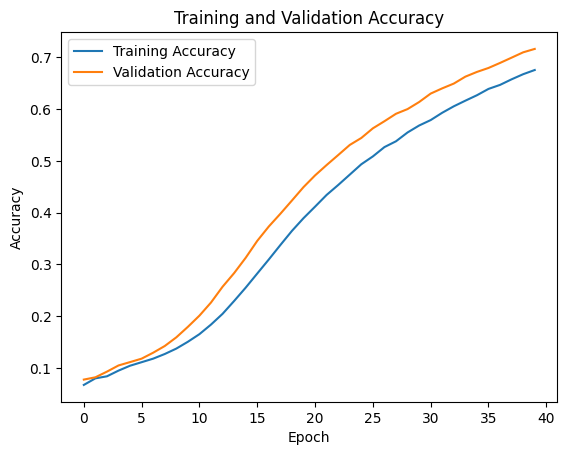

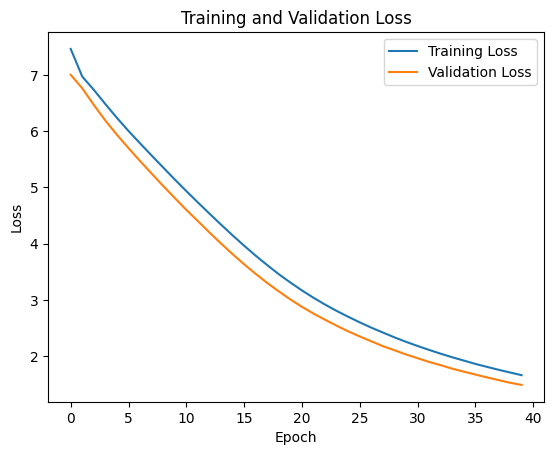

In [11]:
# Assuming you have a history object from your model's training
history = model.fit( x , y , epochs=40, verbose= 1 , validation_data=(x , y))

# Extract accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation accuracy
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**save the model using pickel**

In [18]:
import pickle
model.save('/kaggle/working/text_generator_model_v1_40epok.keras')
with open ('/kaggle/working/tokenizer.pickle' , 'wb') as f:
  pickle.dump(tokenizer , f )